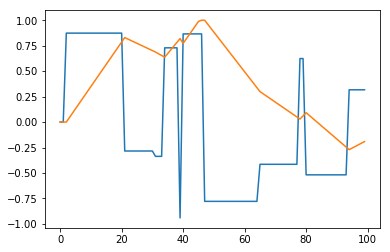

In [236]:
import numpy as np
from scipy.stats import truncnorm
import random
import math
import copy
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
from ipywidgets import widgets
from IPython.display import display

def generate_data(num_of_data):
    input_data=[]
    output_data=[]
    current_input_value=0
    current_output_data=0
    for i in range(num_of_data):
        if (random.random()<0.1):
            current_input_value=(random.random()-0.5)*2
#            current_output_data=0
        current_input_value=current_input_value+(random.random()-0.5)*0
        input_data.append(current_input_value)
        output_data.append(current_output_data)
        current_output_data=current_output_data+0*(current_input_value-current_output_data)+(current_input_value)*0.05
        if (current_output_data<-1):
            current_output_data=-1
        if (current_output_data>1):
            current_output_data=1
    return input_data,output_data

input_data,output_data=generate_data(100)
plt.plot(input_data)
plt.plot(output_data)
plt.show()

In [93]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch import optim


class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.number_of_layers=2
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size, hidden_size,self.number_of_layers)
        self.gru2o = nn.Linear(hidden_size, output_size)
        

    def forward(self, input, hidden):
        gru_output, hidden = self.gru(input, hidden)
        output=self.gru2o(gru_output)
        return output, hidden

    def initHidden(self):
        return Variable(torch.zeros(self.number_of_layers,1,self.hidden_size))
    

traning...

0m 0s (0 0%) tl=0.0012
0m 15s (5000 16%) tl=0.4090
0m 29s (10000 33%) tl=0.5680
0m 44s (15000 50%) tl=0.8474
0m 58s (20000 66%) tl=0.4825
1m 12s (25000 83%) tl=0.3538


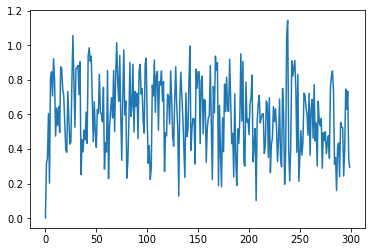

In [240]:
import time
import math
import operator

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)
rnn = RNN(1, 30, 1)

n_iters = 30000
print_every = 5000
plot_every = 100
all_losses = []
total_loss = 0 # Reset every plot_every iters
criterion=nn.L1Loss()
    
print("traning...\n")

start = time.time()
optimizer = optim.Adam(rnn.parameters(), lr=0.0002)
rnn_hidden = rnn.initHidden()
rnn.zero_grad()
loss = 0
test_num=0
input_data,output_data=generate_data(n_iters)
for data_index in range(len(input_data)):
    input_tensor=torch.zeros(1, 1, 1)
    input_tensor[0][0][0]=input_data[data_index]

    output_tensor=torch.zeros(1, 1, 1)
    output_tensor[0][0][0]=output_data[data_index]

    rnn_output, rnn_hidden = rnn(Variable(input_tensor), rnn_hidden)
    loss += criterion(rnn_output, Variable(output_tensor))


    if data_index%50==0:
        loss.backward()
            
        total_loss += loss.data[0]
        optimizer.step()
        rnn_hidden=Variable(rnn_hidden.data)
        rnn.zero_grad()
        loss = 0

        if data_index % print_every == 0:
            print('%s (%d %d%%) tl=%.4f' % (timeSince(start), data_index, data_index / n_iters * 100,total_loss/plot_every))

        if data_index % plot_every == 0:
            all_losses.append(total_loss / plot_every)
            total_loss = 0
            
        test_num+=1
        

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)
plt.show()

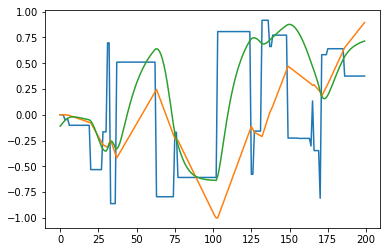

In [248]:
rnn_hidden = rnn.initHidden()

rnn.zero_grad()
loss = 0

rnn_output_data=[]
input_data,output_data=generate_data(200)
for data_index in range(len(input_data)):
    input_tensor=torch.zeros(1, 1, 1)
    input_tensor[0][0][0]=input_data[data_index]
    rnn_output, rnn_hidden = rnn(Variable(input_tensor), rnn_hidden)
    rnn_output_data.append(rnn_output.data.numpy()[0][0][0])
    
plt.plot(input_data)#blue
plt.plot(output_data)#ogange
plt.plot(rnn_output_data)#green
plt.show()